<center><h1>Customer Lifetime Value With Probabilistic Model</h1></center>

<center><img src="https://content.webengage.com/wp-content/uploads/sites/4/2016/05/How-to-Calculate-Increase-Customer-.png" alt="Customer Lifetime Value" width="1000" height="600"></center>

### Business Problem

- An online company would like to know each customer lifetime value for 6 months and 12 months periods.
- We will utilize one of the Buy Till You Die model BG/NBD for predicting purchase amounts and then used Gamma-Gamma model to predict Customer Lifetime Value for desired periods. 

### Importing Libraries

In [3]:
import lifetimes

import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from sklearn.preprocessing import MinMaxScaler

from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


### Reading Data

In [4]:
df = pd.read_csv("../AN_EW_CUST_DATASET_202303141449.csv")

#### Data Understanding

In [5]:
df.head()

,IID,AGE_,INCOME,ETHNIC_CODE_GROUP,AN_BIRTHDAY,POSTAL_CD,LOYALTY_YN,LOYALTY_ENROLLMENT_DT,FIRST_ANTHRO_ORDER,LIFETIME_APPAREL_DEMAND,LIFETIME_APPAREL_ORDERS,ORDER_DT,ORDER_ID,ORDER_LINE_SEQ,PURCHASE_CHANNEL_DERIVED,STORE_NUM,STORE_NAME,STORE_ZIP,DIVISION_NAME,DEPARTMENT_NAME,CLASS_NAME,PRODUCT_ID,ITEM_NAME,MD_STATE,DEMAND_QTY,DEMAND_AMT
0,010TUGIXZ95K5R,57,8,K,0.0,85260.0,Y,00:00.0,3/24/2015,5059.97,67,6/12/2020,4230042557,2,RETAIL,423,"423 SCOTTSDALE,AZ-KIERLND (NA)",85254-2176,ANTHRO. WOMEN'S DIVISION (NA),ANTHRO. WOMEN'S BOTTOMS (NA),PANTS (NA),54766134,ASYMMETRICAL PULL ON PANT,REG PRICE,1,52.46
1,0109BPMLXNREXT,50,7,J,306.0,20017.0,Y,00:00.0,10/15/2015,17353.28,54,2/9/2021,AP11740106,3,DIRECT,2499,ANT DIRECT SELLING (NA),NaN,OFF HOURS (NA),ANTHRO - OFF HOURS (NA),LOUNGE (NA),59001933,COZY KNIT JOGGER,REG PRICE,1,44.96
2,0102I4L0PINZB3,54,11,E,1129.0,23233.0,Y,00:00.0,7/11/2017,4481.17,30,12/26/2022,4440016787,1,RETAIL,444,"444 RICHMOND, VA (NA)",23235-1955,ANTHRO. WOMEN'S DIVISION (NA),JACKETS (NA),OUTERWEAR - ANTHRO. (NA),69997476,UNREAL FUR KATHMANDU COAT,REG PRICE,1,179.97
3,010QS307CAT5WJ,48,11,K,204.0,23453.0,Y,00:00.0,6/28/2018,8312.67,47,9/14/2020,AP08740761,1,DIRECT,2499,ANT DIRECT SELLING (NA),NaN,APPAREL EXTENDED SIZES (NA),PETITES (NA),JEANS - PETITES (NA),58280181,OB HR FEMME DARTED SKINNY,MARKDOWN,1,128.00
4,0101EN5Q3W4AE8,32,9,K,0.0,94108.0,Y,00:00.0,7/12/2019,6528.04,37,3/31/2022,AN09227509,1,DIRECT,2499,ANT DIRECT SELLING (NA),NaN,APPAREL EXTENDED SIZES (NA),PETITES (NA),DRESSES - PETITES (NA),66952177,OB 1 SHLDR CHERRY PRNTD M,MARKDOWN,1,160.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284141 entries, 0 to 284140
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   IID                       284141 non-null  object 
 1   AGE_                      284141 non-null  int64  
 2   INCOME                    284141 non-null  int64  
 3   ETHNIC_CODE_GROUP         284141 non-null  object 
 4   AN_BIRTHDAY               243602 non-null  float64
 5   POSTAL_CD                 284046 non-null  float64
 6   LOYALTY_YN                284141 non-null  object 
 7   LOYALTY_ENROLLMENT_DT     257998 non-null  object 
 8   FIRST_ANTHRO_ORDER        284141 non-null  object 
 9   LIFETIME_APPAREL_DEMAND   284141 non-null  float64
 10  LIFETIME_APPAREL_ORDERS   284141 non-null  int64  
 11  ORDER_DT                  284141 non-null  object 
 12  ORDER_ID                  284141 non-null  object 
 13  ORDER_LINE_SEQ            284141 non-null  i

In [7]:
df.describe()

,AGE_,INCOME,AN_BIRTHDAY,POSTAL_CD,LIFETIME_APPAREL_DEMAND,LIFETIME_APPAREL_ORDERS,ORDER_LINE_SEQ,STORE_NUM,PRODUCT_ID,DEMAND_QTY,DEMAND_AMT
count,284141.000000,284141.000000,243602.000000,284046.000000,284141.000000,284141.000000,284141.000000,284141.000000,2.841410e+05,284141.000000,284141.000000
mean,48.545419,8.457210,246.407924,51109.362378,32430.667156,200.971440,2.827350,1728.718541,6.395121e+07,1.007743,75.450875
std,12.576807,2.964703,377.236308,31665.752074,84730.291008,525.947521,3.023772,944.799585,7.113121e+06,0.141846,57.050634
min,18.000000,1.000000,0.000000,1001.000000,3.570000,1.000000,1.000000,401.000000,2.524303e+07,1.000000,0.050000
25%,40.000000,6.000000,0.000000,21921.000000,2755.020000,20.000000,1.000000,517.000000,5.873028e+07,1.000000,33.600000
50%,49.000000,8.000000,0.000000,48304.000000,7900.850000,53.000000,2.000000,2499.000000,6.295644e+07,1.000000,59.960000
75%,57.000000,11.000000,505.000000,80224.000000,20813.140000,131.000000,3.000000,2499.000000,6.745200e+07,1.000000,103.600000
max,99.000000,12.000000,1231.000000,99901.000000,464042.360000,2896.000000,67.000000,6785.000000,8.247167e+07,38.000000,1500.000000


### Data Preprocessing

In [8]:
# df = df[df['Quantity'] > 0 ]
# df = df[df['UnitPrice'] > 0]
# df = df[~df['InvoiceNo'].str.contains("C",na=False)] # drop returned items

df=df[['IID', 'ORDER_DT', 'DEMAND_AMT', 'DEMAND_QTY']]

#### Missing Values


In [9]:
df.dropna(inplace=True)

#### Handling Outliers

In [10]:
def find_boundaries(df, variable,q1=0.05,q2=0.95):

    # the boundaries are the quantiles

    lower_boundary = df[variable].quantile(q1)
    upper_boundary = df[variable].quantile(q2)

    return upper_boundary, lower_boundary

def capping_outliers(df,variable):
    upper_boundary,lower_boundary =  find_boundaries(df,variable)
    df[variable] = np.where(df[variable] > upper_boundary, upper_boundary,
                       np.where(df[variable] < lower_boundary, lower_boundary, df[variable]))

In [11]:
capping_outliers(df,'DEMAND_QTY')
capping_outliers(df,'DEMAND_AMT')

In [12]:
df.describe()

,DEMAND_AMT,DEMAND_QTY
count,284141.000000,284141.0
mean,73.128209,1.0
std,48.739366,0.0
min,12.000000,1.0
25%,33.600000,1.0
50%,59.960000,1.0
75%,103.600000,1.0
max,178.500000,1.0


#### Creating Column 'Total Price'

In [13]:
df['Total Price'] = df['DEMAND_AMT'] * df['DEMAND_QTY']

In [14]:
df.head()

,IID,ORDER_DT,DEMAND_AMT,DEMAND_QTY,Total Price
0,010TUGIXZ95K5R,6/12/2020,52.46,1.0,52.46
1,0109BPMLXNREXT,2/9/2021,44.96,1.0,44.96
2,0102I4L0PINZB3,12/26/2022,178.50,1.0,178.50
3,010QS307CAT5WJ,9/14/2020,128.00,1.0,128.00
4,0101EN5Q3W4AE8,3/31/2022,160.00,1.0,160.00


In [71]:
df.groupby(["IID", "ORDER_DT"]).size()


IID             ORDER_DT  
010002OCPH2BK7  2022-10-20    1
                2023-01-02    1
0100048IR0CC5G  2020-02-17    4
                2020-04-10    4
                2020-05-20    2
                             ..
0115TZXTL34RJD  2022-11-27    2
                2022-12-13    3
                2022-12-19    2
                2023-01-13    2
                2023-01-15    2
Length: 119015, dtype: int64

In [15]:
df['ORDER_DT']=pd.to_datetime(df['ORDER_DT'])

In [16]:
df.dtypes

IID                    object
ORDER_DT       datetime64[ns]
DEMAND_AMT            float64
DEMAND_QTY            float64
Total Price           float64
dtype: object

In [17]:
df['ORDER_DT'].max()

Timestamp('2023-01-31 00:00:00')

In [18]:
df['ORDER_DT'].min()

Timestamp('2020-02-01 00:00:00')

### Creating Summary Dataset

By using lifetimes we can also create our RFM data from the original dataset.

- **Frequency** represents the number of repeat purchases the customer has made. This means that it’s one less than the total number of purchases. This is actually slightly wrong. It’s the count of time periods the customer had a purchase in. So if using days as units, then it’s the count of days the customer had a purchase on.

- **Recency** represents the age of the customer when they made their most recent purchases. This is equal to the duration between a customer’s first purchase and their latest purchase. (Thus if they have made only 1 purchase, the recency is 0.)

- **T** represents the age of the customer in whatever time units chosen (weekly, in the above dataset). This is equal to the duration between a customer’s first purchase and the end of the period under study.

- **Monetary_Value** represents the average value of a given customer’s purchases. This is equal to the sum of all a customer’s purchases divided by the total number of purchases. Note that the denominator here is different than the frequency described above.

In [72]:
clv = lifetimes.utils.summary_data_from_transaction_data(df,'IID','ORDER_DT','Total Price',observation_period_end='2023-01-31')

In [73]:
clv = clv[clv['frequency']>1] # we want only customers shopped more than 2 times

In [74]:
clv.head()

,frequency,recency,T,monetary_value
IID,,,,
0100048IR0CC5G,11.0,732.0,1079.0,143.748182
010005D13BBMIY,15.0,1012.0,1053.0,67.661333
010006AMGHWDXE,2.0,785.0,1081.0,118.350000
01000BUMK6BOBK,5.0,400.0,439.0,120.240000
01000GRL4WQ6CF,5.0,558.0,791.0,40.446000


### BG/NBD (Beta Geometric/Negative Binomial Distribution Model for Predicting Number of Purchase. This model is a popular model in the RETAIL INDUSTRY.


In [75]:
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(clv['frequency'], clv['recency'], clv['T'])

<lifetimes.BetaGeoFitter: fitted with 8929 subjects, a: 0.00, alpha: 102.61, b: 1.09, r: 1.40>

#### Summary of BG/NBD Model

In [76]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,1.399297,0.021738,1.356692,1.441903
alpha,102.609222,1.891242,98.902388,106.316056
a,0.002439,0.000692,0.001083,0.003796
b,1.087962,0.174670,0.745609,1.430315


### Visualizing our Frequency/Recency Matrix

C:\Users\Owner\anaconda3\lib\site-packages\lifetimes\fitters\beta_geo_fitter.py:256: RuntimeWarning: overflow encountered in double_scalars
  denominator = 1 + (x > 0) * (a / (b + x - 1)) * ((alpha + T) / (alpha + recency)) ** (r + x)


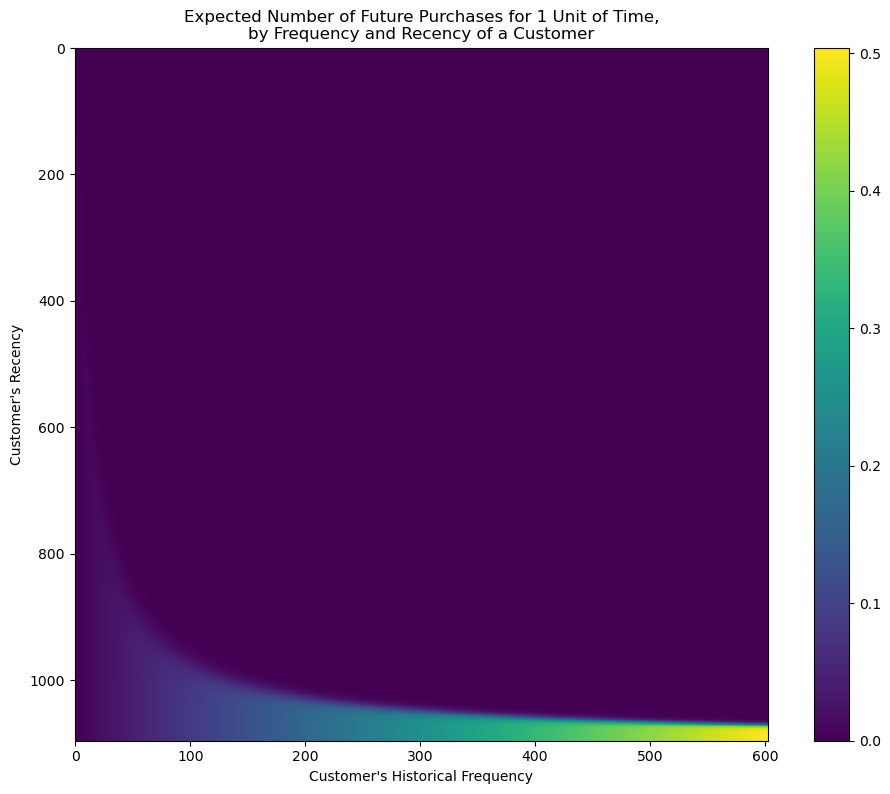

In [77]:
plt.figure(figsize=(12,9))
plot_frequency_recency_matrix(bgf)
plt.show()

#### Expected Number of Purchases in 6 Months

In [90]:
t = 180 # 30 day period
clv['expected_purc_6_months'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, clv['frequency'], clv['recency'], clv['T'])
clv.sort_values(by='expected_purc_6_months',ascending=False).head(5)

,frequency,recency,T,monetary_value,expected_purc_6_months,6_Months_CLV,Segment
IID,,,,,,,
010EAXG020328O,561.0,1094.0,1095.0,232.582139,84.512909,18991.285466,Champions
010PXG5QVFDRTI,395.0,1087.0,1091.0,142.104278,59.766343,8206.910432,Champions
010TPQOHLPTWWR,310.0,925.0,943.0,71.918258,53.502323,3718.901943,Champions
010HK3TA0G509P,60.0,113.0,113.0,291.484000,51.214265,14454.739212,Champions
010N7VG2IOXYEX,275.0,1015.0,1024.0,52.582545,44.148909,2244.038396,Champions


#### Expected Number of Purchases ın 12 Months

In [91]:
#t = 360
#clv['expected_purc_12_months'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, clv['frequency'], clv['recency'], clv['T'])
#clv.sort_values(by='expected_purc_12_months',ascending=False).head(5)

### Gamma - Gamma Model

The Gamma-Gamma Model can predict the most likely value per transaction in the future

#### Assumption

The model we are going to use to estimate the CLV for our userbase is called the Gamma-Gamma submodel, which relies upon an important assumption. The Gamma-Gamma submodel, in fact, assumes that there is no relationship between the monetary value and the purchase frequency. In practice we need to check whether the Pearson correlation between the two vectors is close to 0 in order to use this model.

In [80]:
clv[['frequency','monetary_value']].corr()

,frequency,monetary_value
frequency,1.000000,0.052145
monetary_value,0.052145,1.000000


At this point we can train our Gamma-Gamma submodel and predict the conditional, expected average lifetime value of our customers.

In [81]:
ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(clv["frequency"],
        clv["monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 8929 subjects, p: 4.05, q: 0.46, v: 3.99>

### 6 months Customer Lifetime Value

In [82]:
clv['6_Months_CLV']=ggf.customer_lifetime_value(bgf,
                                   clv["frequency"],
                                   clv["recency"],
                                   clv["T"],
                                   clv["monetary_value"],
                                   time=6,
                                   freq='D',
                                   discount_rate=0.01)

In [83]:
clv.sort_values('6_Months_CLV',ascending=False).head()

,frequency,recency,T,monetary_value,expected_purc_6_months,6_Months_CLV
IID,,,,,,
010EAXG020328O,561.0,1094.0,1095.0,232.582139,84.512909,18991.285466
010EF2O2JTXADL,102.0,1058.0,1061.0,1164.410196,15.991545,18010.126667
010HK3TA0G509P,60.0,113.0,113.0,291.484000,51.214265,14454.739212
0100TTZOKEZYCA,232.0,1092.0,1093.0,409.567672,35.131833,13906.971909
0108VVYR1GJ2F0,129.0,1071.0,1087.0,724.103566,19.725060,13810.981642


#### Segmentation Customers by 6 Months CLV

In [84]:
clv['Segment'] =  pd.qcut(clv['6_Months_CLV'],4,labels = ['Hibernating','Need Attention',
                                                          'Loyal Customers','Champions'])

In [85]:
clv.head()

,frequency,recency,T,monetary_value,expected_purc_6_months,6_Months_CLV,Segment
IID,,,,,,,
0100048IR0CC5G,11.0,732.0,1079.0,143.748182,1.858018,261.801685,Loyal Customers
010005D13BBMIY,15.0,1012.0,1053.0,67.661333,2.553143,169.016464,Need Attention
010006AMGHWDXE,2.0,785.0,1081.0,118.350000,0.515226,64.161381,Hibernating
01000BUMK6BOBK,5.0,400.0,439.0,120.240000,2.124187,255.135881,Loyal Customers
01000GRL4WQ6CF,5.0,558.0,791.0,40.446000,1.284399,52.567287,Hibernating


### Final Dataframe. BG/NBD (Beta Geometric/Negative Binomial Distribution Model for Predicting Number of Purchase. This model is a popular model in the RETAIL INDUSTRY

In [86]:
clv_segments=clv.groupby('Segment').mean()
clv_segments
# Shows the "Champion shoppers" will shop 5 times in the next 6 mos on average and will spend $1063.00
# "Hibernators" will visit once in 6 mos and spend $77 in the next 6 mos on average
# TARGETS: "Hibernators" and "Need Attention"

,frequency,recency,T,monetary_value,expected_purc_6_months,6_Months_CLV
Segment,,,,,,
Hibernating,4.364980,693.476489,837.280788,81.208973,1.010596,77.164766
Need Attention,5.968638,684.912186,810.444892,138.360672,1.451700,176.795299
Loyal Customers,9.435036,695.343638,797.132616,185.386590,2.128952,335.216590
Champions,25.844086,763.352599,824.289427,262.781299,5.013041,1063.607087


### Group by Segment

In [87]:
clv_segments.reset_index(inplace=True)

In [88]:
clv_segments

,Segment,frequency,recency,T,monetary_value,expected_purc_6_months,6_Months_CLV
0,Hibernating,4.364980,693.476489,837.280788,81.208973,1.010596,77.164766
1,Need Attention,5.968638,684.912186,810.444892,138.360672,1.451700,176.795299
2,Loyal Customers,9.435036,695.343638,797.132616,185.386590,2.128952,335.216590
3,Champions,25.844086,763.352599,824.289427,262.781299,5.013041,1063.607087


In [89]:
clv_segments.to_csv('clv_segments.csv', index=False)